In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-darkgrid')
import warnings
warnings.filterwarnings('ignore')

### EDA : train+test

In [4]:
train = pd.read_csv('training_set_VU_DM.csv',sep=',')
test = pd.read_csv('test_set_VU_DM.csv',sep=',')

In [5]:
print('train :',len(train),'; test :',len(test))

train : 4958347 ; test : 4959183


In [6]:
print(len(train)+len(test))

9917530


In [9]:
print(len(train)/(len(train)+len(test)),len(test)/(len(train)+len(test)))

0.4999578524088155 0.5000421475911845


In [2]:
data = pd.concat((pd.read_csv('training_set_VU_DM.csv',sep=','),pd.read_csv('test_set_VU_DM.csv',sep=','))).reset_index(drop=True)

In [3]:
data.columns.values

array(['booking_bool', 'click_bool', 'comp1_inv', 'comp1_rate',
       'comp1_rate_percent_diff', 'comp2_inv', 'comp2_rate',
       'comp2_rate_percent_diff', 'comp3_inv', 'comp3_rate',
       'comp3_rate_percent_diff', 'comp4_inv', 'comp4_rate',
       'comp4_rate_percent_diff', 'comp5_inv', 'comp5_rate',
       'comp5_rate_percent_diff', 'comp6_inv', 'comp6_rate',
       'comp6_rate_percent_diff', 'comp7_inv', 'comp7_rate',
       'comp7_rate_percent_diff', 'comp8_inv', 'comp8_rate',
       'comp8_rate_percent_diff', 'date_time', 'gross_bookings_usd',
       'orig_destination_distance', 'position', 'price_usd',
       'promotion_flag', 'prop_brand_bool', 'prop_country_id', 'prop_id',
       'prop_location_score1', 'prop_location_score2',
       'prop_log_historical_price', 'prop_review_score',
       'prop_starrating', 'random_bool', 'site_id', 'srch_adults_count',
       'srch_booking_window', 'srch_children_count',
       'srch_destination_id', 'srch_id', 'srch_length_of_stay',
   

In [6]:
NA_per = data.isnull().sum()/len(data)*100
NA_per = NA_per.sort_values(ascending=False)
missing_ratio = pd.DataFrame({'Missing Ratio' :NA_per})

In [7]:
len(missing_ratio)

54

Text(0.5, 1.0, 'Percent missing data by features')

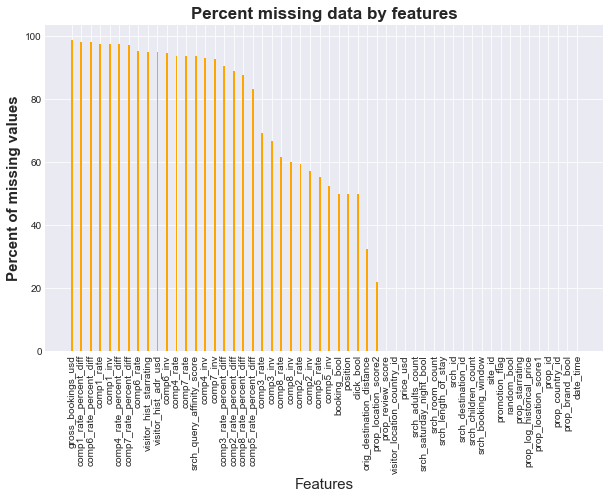

In [14]:
plt.figure(figsize=(10, 6))
plt.xticks(rotation='90')
plt.bar(x=missing_ratio.index, height=missing_ratio['Missing Ratio'],width=0.2,color='orange')
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15,weight='bold')
plt.title('Percent missing data by features', fontsize=17,weight='bold')

### Search Criteria : 
#### 'srch_booking_window', 'srch_children_count',
#### 'srch_destination_id',  'srch_length_of_stay',
#### 'srch_room_count', 'srch_saturday_night_bool'
#### NO 'srch_query_affinity_score' (MISSING), NO 'srch_id' (NO MEANING), 

In [33]:
search = pd.DataFrame(columns=['booking_window','children_count','destination_id','length_of_stay','room_count','saturday_night_bool'])
search['booking_window'] = data['srch_booking_window']
search['children_count'] = data['srch_children_count']
search['destination_id'] = data['srch_destination_id']
search['length_of_stay'] = data['srch_length_of_stay']
search['room_count'] = data['srch_room_count']
search['saturday_night_bool'] = data['srch_saturday_night_bool']

Text(0.5, 1.0, 'Staurday Night Bool')

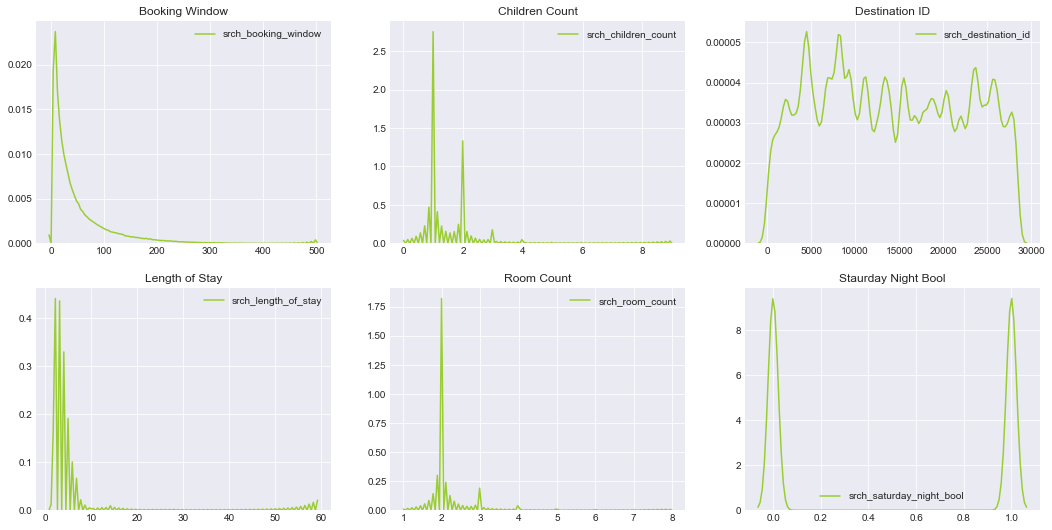

In [32]:
import seaborn as sns
plt.figure(figsize=(18,9))
plt.subplot(231)
sns.kdeplot(data.srch_booking_window, shade=False, color='yellowgreen',)
plt.title('Booking Window')
plt.subplot(232)
sns.kdeplot(data.srch_children_count, shade=False, color='yellowgreen',)
plt.title('Children Count')
plt.subplot(233)
sns.kdeplot(data.srch_destination_id, shade=False, color='yellowgreen',)
plt.title('Destination ID')
plt.subplot(234)
sns.kdeplot(data.srch_length_of_stay, shade=False, color='yellowgreen',)
plt.title('Length of Stay')
plt.subplot(235)
sns.kdeplot(data.srch_room_count, shade=False, color='yellowgreen',)
plt.title('Room Count')
plt.subplot(236)
sns.kdeplot(data.srch_saturday_night_bool, shade=False, color='yellowgreen',)
plt.title('Staurday Night Bool')

Text(0.5, 1, 'Correlation between search criteria')

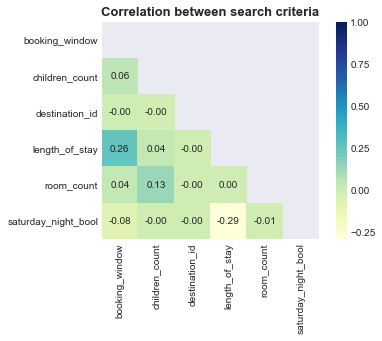

In [49]:
search_corr = search.corr()
mask1 = np.zeros_like(search_corr, dtype=np.bool)
mask1[np.triu_indices_from(mask1)] = True
ax1 = sns.heatmap(search_corr, mask=mask1, cmap="YlGnBu", square=True, annot=True, fmt='0.2f')
bottom, top = ax1.get_ylim()
ax1.set_ylim(bottom + 0.5, top - 0.5)
ax1.set_title('Correlation between search criteria',fontsize='13',weight='bold')

### hotel characteristics
#### 'prop_starrating', 'prop_review_score'
#### 'prop_brand_bool', 'prop_location_score1'
#### 'prop_location_score2', 'prop_log_historical_price'
#### 'promotion_flag','price_usd'
#### 'position'

In [39]:
hotel = pd.DataFrame(columns=['prop_starrating', 'prop_review_score','prop_brand_bool', 'prop_location_score1','prop_location_score2', 'prop_log_historical_price', 'promotion_flag','price_usd','position'])
hotel['starrating'] = data['prop_starrating']
hotel['review_score'] = data['prop_review_score']
hotel['brand_bool'] = data['prop_brand_bool']
hotel['location_score1'] = data['prop_location_score1']
hotel['location_score2'] = data['prop_location_score2']
hotel['log_historical_price'] = data['prop_log_historical_price']
hotel['price_usd'] = data['price_usd']
hotel['position'] = data['position']

Text(0.5, 1.0, 'Position')

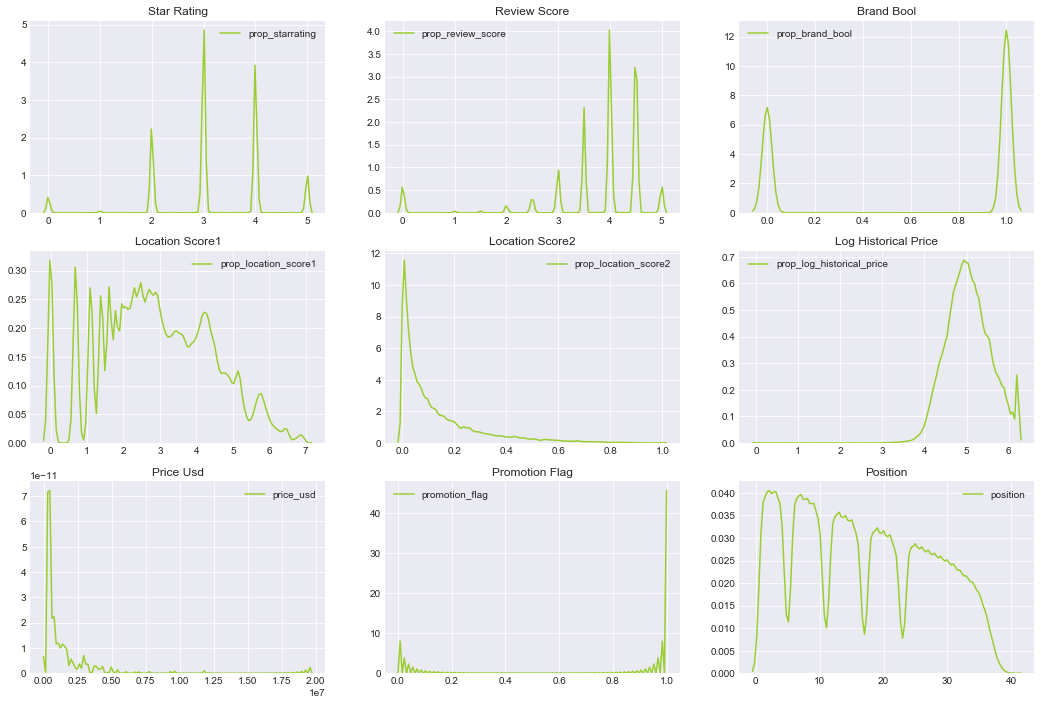

In [40]:
plt.figure(figsize=(18,12))
plt.subplot(331)
sns.kdeplot(data.prop_starrating, shade=False, color='yellowgreen',)
plt.title('Star Rating')
plt.subplot(332)
sns.kdeplot(data.prop_review_score, shade=False, color='yellowgreen',)
plt.title('Review Score')
plt.subplot(333)
sns.kdeplot(data.prop_brand_bool, shade=False, color='yellowgreen',)
plt.title('Brand Bool')
plt.subplot(334)
sns.kdeplot(data.prop_location_score1, shade=False, color='yellowgreen',)
plt.title('Location Score1')
plt.subplot(335)
sns.kdeplot(data.prop_location_score2, shade=False, color='yellowgreen',)
plt.title('Location Score2')
plt.subplot(336)
sns.kdeplot(data.prop_log_historical_price, shade=False, color='yellowgreen',)
plt.title('Log Historical Price')
plt.subplot(337)
sns.kdeplot(data.price_usd, shade=False, color='yellowgreen',)
plt.title('Price Usd')
plt.subplot(338)
sns.kdeplot(data.promotion_flag, shade=False, color='yellowgreen',)
plt.title('Promotion Flag')
plt.subplot(339)
sns.kdeplot(data.position, shade=False, color='yellowgreen',)
plt.title('Position')

Text(0.5, 1, 'Correlation between hotel characteristics')

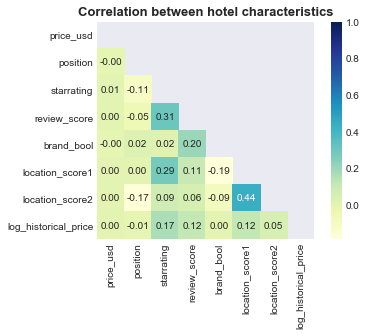

In [50]:
hotel_corr = hotel.corr()
mask2 = np.zeros_like(hotel_corr, dtype=np.bool)
mask2[np.triu_indices_from(mask2)] = True
ax2 = sns.heatmap(hotel_corr, mask=mask2, cmap="YlGnBu", square=True, annot=True, fmt='0.2f')
bottom, top = ax2.get_ylim()
ax2.set_ylim(bottom + 0.5, top - 0.5)
ax2.set_title('Correlation between hotel characteristics',fontsize='13',weight='bold')

### visitor information:
#### 'orig_destination_distance', 'visitor_hist_adr_usd', 
#### 'visitor_hist_starrating', 'visitor_location_country_id'

In [64]:
visitor = pd.DataFrame(columns=['orig_destination_distance','visitor_location_country_id','visitor_hist_adr_usd','visitor_hist_starrating'])
visitor['orig_destination_distance'] = data['orig_destination_distance']
visitor['visitor_location_country_id'] = data['visitor_location_country_id']
visitor['visitor_hist_adr_usd'] = data['visitor_hist_adr_usd']
visitor['visitor_hist_starrating'] = data['visitor_hist_starrating']

Text(0.5, 1.0, 'visitor hist Star Rating')

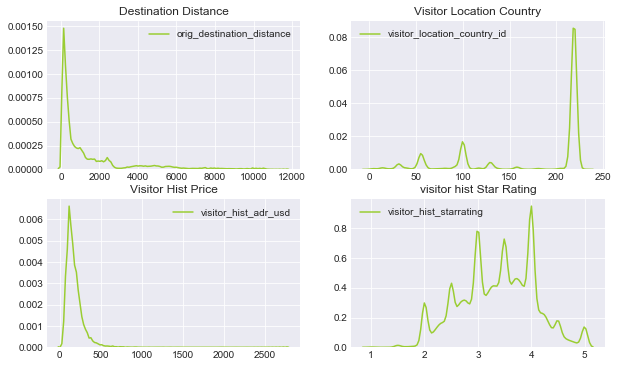

In [65]:
plt.figure(figsize=(10,6))
plt.subplot(221)
sns.kdeplot(data.orig_destination_distance, shade=False, color='yellowgreen',)
plt.title('Destination Distance')
plt.subplot(222)
sns.kdeplot(data.visitor_location_country_id, shade=False, color='yellowgreen',)
plt.title('Visitor Location Country')
plt.subplot(223)
sns.kdeplot(data.visitor_hist_adr_usd, shade=False, color='yellowgreen',)
plt.title('Visitor Hist Price')
plt.subplot(224)
sns.kdeplot(data.visitor_hist_starrating, shade=False, color='yellowgreen',)
plt.title('visitor hist Star Rating')

Text(0.5, 1, 'Correlation between visitor infromation')

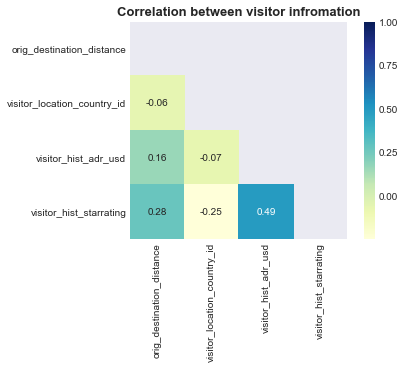

In [66]:
visitor_corr = visitor.corr()
mask3 = np.zeros_like(visitor_corr, dtype=np.bool)
mask3[np.triu_indices_from(mask3)] = True
ax3 = sns.heatmap(visitor_corr, mask=mask3, cmap="YlGnBu", square=True, annot=True, fmt='0.2f')
bottom, top = ax3.get_ylim()
ax3.set_ylim(bottom + 0.5, top - 0.5)
ax3.set_title('Correlation between visitor infromation',fontsize='13',weight='bold')

### Visitor information

In [68]:
visitor_booking = data[data['booking_bool']==1]
visitor_clicking = data[data['click_bool']==1]
visitor_non = data[data['click_bool']==0]

Text(0.5, 1.0, 'Visitor Histotical Mean Star Rating')

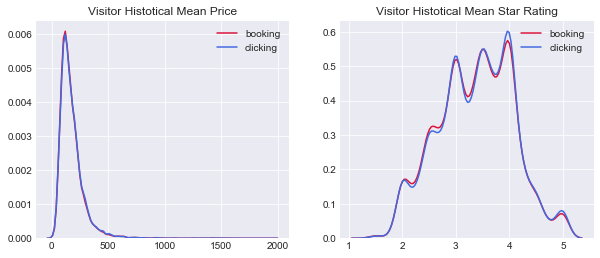

In [72]:
plt.figure(figsize=(10,4))
plt.subplot(121)
ax4 = sns.kdeplot(visitor_booking.visitor_hist_adr_usd,shade=False, color='crimson',label='booking')
ax5 = sns.kdeplot(visitor_clicking.visitor_hist_adr_usd,shade=False, color='royalblue',label='clicking')
#ax6 = sns.kdeplot(visitor_non.visitor_hist_adr_usd,shade=False, color='royalblue',label='no booking/clicking')
ax5.set_title ('Visitor Histotical Mean Price')
plt.subplot(122)
ax7 = sns.kdeplot(visitor_booking.visitor_hist_starrating,shade=False, color='crimson',label='booking')
ax8 = sns.kdeplot(visitor_clicking.visitor_hist_starrating,shade=False, color='royalblue',label='clicking')
#ax9 = sns.kdeplot(visitor_non.visitor_hist_adr_usd,shade=False, color='royalblue',label='no booking/clicking')
ax8.set_title ('Visitor Histotical Mean Star Rating')

### Competitor 
####  'comp1_inv', 'comp1_rate','comp1_rate_percent_diff', 'comp2_inv', 'comp2_rate',
####  'comp2_rate_percent_diff', 'comp3_inv', 'comp3_rate',
####  'comp3_rate_percent_diff', 'comp4_inv', 'comp4_rate',
####  'comp4_rate_percent_diff', 'comp5_inv', 'comp5_rate',
####  'comp5_rate_percent_diff', 'comp6_inv', 'comp6_rate',
####  'comp6_rate_percent_diff', 'comp7_inv', 'comp7_rate',
####  'comp7_rate_percent_diff', 'comp8_inv', 'comp8_rate', 'comp8_rate_percent_diff',

#### The booking times / total and clicking/total.


In [38]:
def book_click(index,list):
    book = []
    click = []
    for i in list:
        com = data[data[index]==i]
        length = len(com)
        book.append(com.loc[:,'booking_bool'].value_counts()[1]/len(com)*100)
        click.append(com.loc[:,'click_bool'].value_counts()[1]/len(com)*100)
    return [book,click]

In [58]:
list = [-1,0,1]
book1,click1 = book_click('comp1_rate',list)
book2,click2 = book_click('comp2_rate',list)
book3,click3 = book_click('comp3_rate',list)
book4,click4 = book_click('comp4_rate',list)
book5,click5 = book_click('comp5_rate',list)
book6,click6 = book_click('comp6_rate',list)
book7,click7 = book_click('comp7_rate',list)
book8,click8 = book_click('comp8_rate',list)

(0, 3)

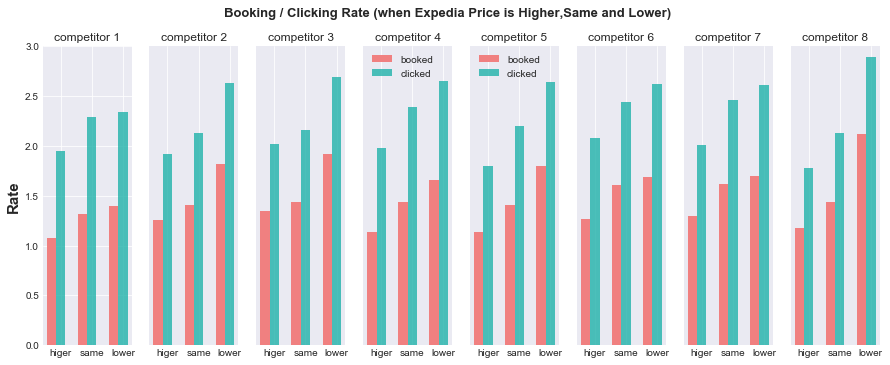

In [90]:
xaxes=[i for i in range(1,4)]
plt.figure(figsize=(15,5.5))
plt.suptitle('Booking / Clicking Rate (when Expedia Price is Higher,Same and Lower)', fontsize=13, weight='bold')
plt.subplot(181)
width = 0.3
ax1 = plt.bar(xaxes,book1, width, color="lightcoral", label="booked")
xaxes=[i+width for i in xaxes]
ax2 = plt.bar(xaxes,click1, width, color="lightseagreen",label="clicked",alpha=0.8)
plt.xticks(xaxes,['higer','same','lower'])
plt.ylabel("Rate",size=15, weight='bold')
plt.title('competitor 1')
plt.ylim(0,3)

plt.subplot(182)
ax3 = plt.bar(xaxes,book2, width, color="lightcoral", label="booked")
xaxes=[i+width for i in xaxes]
ax4 = plt.bar(xaxes,click2, width, color="lightseagreen",label="clicked",alpha=0.8)
plt.xticks(xaxes,['higer','same','lower'])
plt.yticks([])
plt.ylim(0,3)
plt.title('competitor 2')

plt.subplot(183)
ax5 = plt.bar(xaxes,book3, width, color="lightcoral", label="booked")
xaxes=[i+width for i in xaxes]
ax6 = plt.bar(xaxes,click3, width, color="lightseagreen",label="clicked",alpha=0.8)
plt.xticks(xaxes,['higer','same','lower'])
plt.yticks([])
plt.ylim(0,3)
plt.title('competitor 3')

plt.subplot(184)
ax7 = plt.bar(xaxes,book4, width, color="lightcoral", label="booked")
xaxes=[i+width for i in xaxes]
ax8 = plt.bar(xaxes,click4, width, color="lightseagreen",label="clicked",alpha=0.8)
plt.xticks(xaxes,['higer','same','lower'])
plt.yticks([])
plt.ylim(0,3)
plt.legend()
plt.title('competitor 4')

plt.subplot(185)
ax9 = plt.bar(xaxes,book5, width, color="lightcoral", label="booked")
xaxes=[i+width for i in xaxes]
ax10 = plt.bar(xaxes,click5, width, color="lightseagreen",label="clicked",alpha=0.8)
plt.xticks(xaxes,['higer','same','lower'])
plt.legend()
plt.yticks([])
plt.ylim(0,3)
plt.title('competitor 5')

plt.subplot(186)
ax11 = plt.bar(xaxes,book6, width, color="lightcoral", label="booked")
xaxes=[i+width for i in xaxes]
ax12 = plt.bar(xaxes,click6, width, color="lightseagreen",label="clicked",alpha=0.8)
plt.xticks(xaxes,['higer','same','lower'])
plt.yticks([])
plt.ylim(0,3)
plt.title('competitor 6')

plt.subplot(187)
ax13 = plt.bar(xaxes,book7, width, color="lightcoral", label="booked")
xaxes=[i+width for i in xaxes]
ax14 = plt.bar(xaxes,click7, width, color="lightseagreen",label="clicked",alpha=0.8)
plt.xticks(xaxes,['higer','same','lower'])
plt.yticks([])
plt.ylim(0,3)
plt.title('competitor 7')

plt.subplot(188)
ax15 = plt.bar(xaxes,book8, width, color="lightcoral", label="booked")
xaxes=[i+width for i in xaxes]
ax16 = plt.bar(xaxes,click8, width, color="lightseagreen",label="clicked",alpha=0.8)
plt.xticks(xaxes,['higer','same','lower'])
plt.title('competitor 8')
plt.yticks([])
plt.ylim(0,3)
# plt.title("Occurences of booked/clicked hotel at different position",size=15)
# #plt.xlabel("Position",size=15)
# plt.ylabel("Occurences ",size=15)
#plt.legend()

In [14]:
df_book_random = data.loc[(data['booking_bool']==1) & (data['random_bool']==1)]
df_click_random = data.loc[(data["click_bool"]==1) & (data['random_bool']==1)]

df_book_random =df_book_random[["booking_bool", "position"]]
df_click_random =df_click_random[["click_bool", "position"]]

book_count= df_book_random.groupby("position").sum()
click_count = df_click_random.groupby("position").sum()

In [31]:
df_book = data.loc[(data['booking_bool']==1) & (data['random_bool']==0)]
df_click = data.loc[(data["click_bool"]==1) & (data['random_bool']==0)]

df_book =df_book[["booking_bool", "position"]]
df_click =df_click[["click_bool", "position"]]

book_count2= df_book.groupby("position").sum()
click_count2 = df_click.groupby("position").sum()

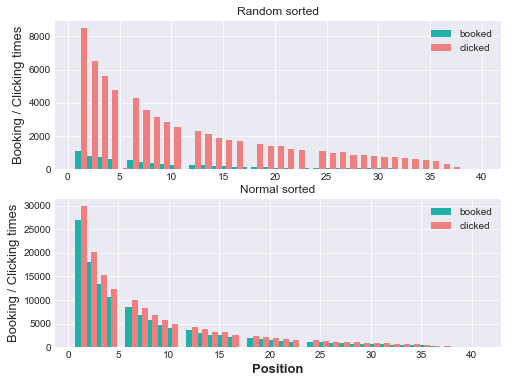

In [73]:
plt.figure(figsize=(8,6))
width = 0.6
#plt.suptitle('Times of booking or clicking when displayed sorted randomly or not')
plt.subplot(211)
plt.title('Random sorted')
xaxes=[i for i in range(1,len(book_count.iloc[:,0])+1)]
ax1 = plt.bar(xaxes,book_count.iloc[:,0], width, color="lightseagreen", label="booked")

xaxes=[i for i in range(1,len(click_count.iloc[:,0])+1)]
xaxes=[i+width for i in xaxes]
ax2 = plt.bar(xaxes,click_count.iloc[:,0], width, color="lightcoral",label="clicked")
plt.ylabel("Booking / Clicking times",size=13)
#plt.xlabel("Position",size=13)
plt.legend()

plt.subplot(212)
plt.title('Normal sorted')
xaxes=[i for i in range(1,len(book_count2.iloc[:,0])+1)]
ax3 = plt.bar(xaxes,book_count2.iloc[:,0], width, color="lightseagreen", label="booked")

xaxes=[i for i in range(1,len(click_count2.iloc[:,0])+1)]
xaxes=[i+width for i in xaxes]
ax4 = plt.bar(xaxes,click_count2.iloc[:,0], width, color="lightcoral",label="clicked")

#plt.title("Occurences of booked/clicked hotel at different position",size=15)
plt.xlabel("Position",size=13,weight='bold')
plt.ylabel("Booking / Clicking times",size=13)
plt.legend()

In [1]:
columns = ['booking_bool', 'click_bool', 'comp1_inv', 'comp1_rate',
       'comp1_rate_percent_diff', 'comp2_inv', 'comp2_rate',
       'comp2_rate_percent_diff', 'comp3_inv', 'comp3_rate',
       'comp3_rate_percent_diff', 'comp4_inv', 'comp4_rate',
       'comp4_rate_percent_diff', 'comp5_inv', 'comp5_rate',
       'comp5_rate_percent_diff', 'comp6_inv', 'comp6_rate',
       'comp6_rate_percent_diff', 'comp7_inv', 'comp7_rate',
       'comp7_rate_percent_diff', 'comp8_inv', 'comp8_rate',
       'comp8_rate_percent_diff', 'date_time', 'gross_bookings_usd',
       'orig_destination_distance', 'position', 'price_usd',
       'promotion_flag', 'prop_brand_bool', 'prop_country_id', 'prop_id',
       'prop_location_score1', 'prop_location_score2',
       'prop_log_historical_price', 'prop_review_score',
       'prop_starrating', 'random_bool', 'site_id', 'srch_adults_count',
       'srch_booking_window', 'srch_children_count',
       'srch_destination_id', 'srch_id', 'srch_length_of_stay',
       'srch_query_affinity_score', 'srch_room_count',
       'srch_saturday_night_bool', 'visitor_hist_adr_usd',
       'visitor_hist_starrating', 'visitor_location_country_id']

In [2]:
len(columns)

54